In [3]:
# Install YOLOv8 from Ultralytics
!pip install ultralytics


In [2]:
import os
import json
import pandas as pd

c:\Users\soura\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
det = 'https://bj.bcebos.com/paddlex/examples/meter_reader/datasets/meter_det.tar.gz'

if ('meter_seg' not in os.listdir()):
    for i in [det]:
        !wget $i
        dir_name = i.split('/')[-1]
        !tar -xf $dir_name
else:
    print('Directory already exist')

In [4]:
import os
import json
import pandas as pd

# Define class mapping (update if you have multiple classes)
class_map = {'meter': 0}

# Function to convert bbox to YOLO format
def convert_bbox_to_yolo(bbox, img_width, img_height):
    x, y, w, h = bbox
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    width = w / img_width
    height = h / img_height
    return [x_center, y_center, width, height]

# Process annotations for train/test datasets
for name in ['test', 'train']:
    with open(f'meter_det/annotations/instance_{name}.json') as file:
        annotations = json.load(file)

    images = annotations['images']
    annotation = annotations['annotations']

    # Create mapping for image metadata
    img_datas = {i['id']: [i['file_name'], i['width'], i['height']] for i in images}

    # Group bbox annotations by image
    bboxs = {}
    for i in annotation:
        img_id = i['image_id']
        if img_id not in bboxs:
            bboxs[img_id] = [i['bbox']]
        else:
            bboxs[img_id].append(i['bbox'])

    # Generate YOLO-format labels
    for img_id, bboxes in bboxs.items():
        file_name, width, height = img_datas[img_id]
        txt_file_path = f"meter_det/{name}/labels/{os.path.splitext(file_name)[0]}.txt"

        os.makedirs(os.path.dirname(txt_file_path), exist_ok=True)
        with open(txt_file_path, 'w') as label_file:
            for bbox in bboxes:
                yolo_bbox = convert_bbox_to_yolo(bbox, width, height)
                label_file.write(f"{class_map['meter']} " + " ".join(map(str, yolo_bbox)) + "\n")

    print(f"Processed {name} dataset.")


Processed test dataset.
Processed train dataset.


In [2]:
!yolo task=detect mode=train model=best.pt data=data.yaml epochs=50 imgsz=640

New https://pypi.org/project/ultralytics/8.3.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.59 🚀 Python-3.11.5 torch-2.2.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=best.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

Traceback (most recent call last):
  File "c:\Users\soura\anaconda3\Lib\site-packages\ultralytics\engine\trainer.py", line 562, in get_dataset
    data = check_det_dataset(self.args.data)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\soura\anaconda3\Lib\site-packages\ultralytics\data\utils.py", line 378, in check_det_dataset
    raise FileNotFoundError(m)
FileNotFoundError: 
Dataset 'data.yaml' images not found ⚠️, missing path 'C:\Users\soura\GSoC23-OpenVINO\Model-training\training-notebooks\dataset\val\images'
Note dataset download directory is 'C:\Users\soura\GSoC23-OpenVINO\Model-training\training-notebooks'. You can update this in 'C:\Users\soura\AppData\Roaming\Ultralytics\settings.json'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\soura\anaconda3\Scripts\yolo.exe\__main__.py", line 7

In [2]:
import os

# Define paths
images_dir = 'meter_det/train/images'  # Update with your images path
labels_dir = 'meter_det/train/labels'  # Update with your labels path

# Validate labels
for image_file in os.listdir(images_dir):
    image_name, _ = os.path.splitext(image_file)
    label_file = f"{image_name}.txt"
    label_path = os.path.join(labels_dir, label_file)
    
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            if len(lines) == 0:
                print(f"Empty label file: {label_path}")
            else:
                print(f"Valid labels found for {image_file}")
    else:
        print(f"Missing label file for {image_file}")

Valid labels found for 20190822_1.jpg
Valid labels found for 20190822_10.jpg
Valid labels found for 20190822_101.jpg
Valid labels found for 20190822_102.jpg
Valid labels found for 20190822_104.jpg
Valid labels found for 20190822_106.jpg
Valid labels found for 20190822_107.jpg
Valid labels found for 20190822_108.jpg
Valid labels found for 20190822_109.jpg
Valid labels found for 20190822_11.jpg
Valid labels found for 20190822_111.jpg
Valid labels found for 20190822_112.jpg
Valid labels found for 20190822_113.jpg
Valid labels found for 20190822_114.jpg
Valid labels found for 20190822_115.jpg
Valid labels found for 20190822_116.jpg
Valid labels found for 20190822_117.jpg
Valid labels found for 20190822_118.jpg
Valid labels found for 20190822_119.jpg
Valid labels found for 20190822_12.jpg
Valid labels found for 20190822_120.jpg
Valid labels found for 20190822_121.jpg
Valid labels found for 20190822_122.jpg
Valid labels found for 20190822_125.jpg
Valid labels found for 20190822_126.jpg
Valid

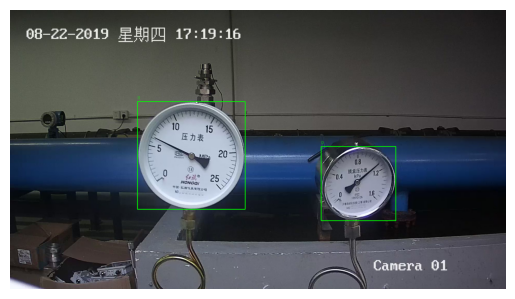

In [6]:
import cv2
import matplotlib.pyplot as plt

# Paths
images_dir = 'meter_det/train/images'
labels_dir = 'meter_det/train/labels'

# Function to draw bounding boxes
def draw_bboxes(image_path, label_path):
    img = cv2.imread(image_path)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())
            x1 = int((x_center - bbox_width / 2) * w)
            y1 = int((y_center - bbox_height / 2) * h)
            x2 = int((x_center + bbox_width / 2) * w)
            y2 = int((y_center + bbox_height / 2) * h)

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, str(int(cls)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Test visualization
# Get the first image from the directory
image_files = os.listdir(images_dir)
if image_files:
    image_file = image_files[0]
    image_path = os.path.join(images_dir, image_file)
    label_path = os.path.join(labels_dir, f"{os.path.splitext(image_file)[0]}.txt")
    
    draw_bboxes(image_path, label_path)
else:
    print("No images found in the directory")


In [2]:
import cv2
import math
import numpy as np
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO('detect/train/weights/best.pt')  # Update with your YOLO model path

# Helper function to map needle angle to meter value
def map_angle_to_value(angle, min_angle, max_angle, min_value, max_value):
    return min_value + (angle - min_angle) * (max_value - min_value) / (max_angle - min_angle)

# Step 1: Detect the analog meter
def detect_meter(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    
    # Detect the meter using YOLO
    results = model(image_path)
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            confidence = box.conf[0]               # Confidence score
            
            print(f"Detected meter with confidence: {confidence}")
            meter_roi = img[y1:y2, x1:x2]          # Crop the meter region
            cv2.imwrite('meter_roi.jpg', meter_roi)
            return meter_roi
    return None

# Step 2: Detect the needle and calculate its angle
def detect_needle_and_angle(meter_roi):
    # Convert to grayscale
    gray = cv2.cvtColor(meter_roi, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur and edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    cv2.imwrite('edges.jpg', edges)

    # Use Hough Line Transform to detect the needle
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

    # Draw lines and calculate the angle
    if lines is not None:
        needle_angle = None
        for line in lines:
            x1, y1, x2, y2 = line[0]
            needle_angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
            cv2.line(meter_roi, (x1, y1), (x2, y2), (0, 255, 0), 2)
            break  # Use the first detected line for simplicity

        cv2.imwrite('needle_detected.jpg', meter_roi)
        print(f"Needle angle: {needle_angle} degrees")
        return needle_angle
    else:
        print("Needle not detected!")
        return None

# Step 3: Main Function
def main(image_path):
    # Detect the analog meter
    meter_roi = detect_meter(image_path)
    if meter_roi is None:
        print("No meter detected in the image!")
        return

    # Detect the needle and get the angle
    needle_angle = detect_needle_and_angle(meter_roi)
    if needle_angle is None:
        print("Could not detect the needle.")
        return

   
    min_angle, max_angle = -90, 90  # Adjust based on your meter calibration
    min_value, max_value = 0, 100  # Adjust based on your meter scale
    meter_value = map_angle_to_value(needle_angle, min_angle, max_angle, min_value, max_value)
    print(f"Meter Value: {meter_value}")

# Run the pipeline
if __name__ == "__main__":
    image_path = '2.png' 
    main(image_path)



image 1/1 c:\Users\soura\Downloads\runs\2.png: 384x640 1 meter, 119.4ms
Speed: 4.0ms preprocess, 119.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Detected meter with confidence: 0.9795424938201904
Needle not detected!
Could not detect the needle.


In [2]:

import cv2
import numpy as np
from ultralytics import YOLO
import easyocr
model = YOLO("Models/model_1_0_2.pt")
reader = easyocr.Reader(['en'])

from typing import Dict, Any
def detect_and_recognize(image_path: str) -> Dict[str, Dict[str, Any]]:
    results = model.predict(source=image_path, conf=0.15, save=False)
    output = {}

    for result in results:
        for box in result.boxes:
            # Extract detection info
            x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
            class_id = int(box.cls)
            class_name = result.names[class_id]
            yolo_conf = box.conf.item()

            # Process image region
            image = cv2.imread(image_path)
            cropped = image[y_min:y_max, x_min:x_max]
            ocr_results = reader.readtext(cropped)
            ocr_boxes = [detection[0] for detection in ocr_results]
            # _, text, conf = box
            print(result.names[class_id] , box.conf)
            # Print OCR confidence for each detected text
            for detection in ocr_results:
                ocr_text = detection[1]
                ocr_confidence = detection[2]
                print(f"OCR Text: {ocr_text}, Confidence: {ocr_confidence}")


    # return output

detect_and_recognize('testimg/images/23.jpeg')


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



image 1/1 c:\Users\soura\Downloads\ML-Model\testimg\images\23.jpeg: 480x640 1 kv, 1 TimeLeft, 68.9ms
Speed: 3.0ms preprocess, 68.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
TimeLeft tensor([0.9297])
OCR Text: Tmer, Confidence: 0.17520716381281926
OCR Text: TimeLeft, Confidence: 0.9970262245435698
OCR Text: Oooo:05.00, Confidence: 0.13130057071959095
kv tensor([0.8708])
OCR Text: High, Confidence: 0.9999983906745911
OCR Text: 0.05, Confidence: 0.9999881982803345
OCR Text: kV, Confidence: 0.9731034516254133
OCR Text: Volt, Confidence: 0.9999270439147949


In [ ]:

import cv2
import numpy as np
from ultralytics import YOLO
import easyocr
model = YOLO("Models/model_1_0_2.pt")
reader = easyocr.Reader(['en'])

from typing import Dict, Any
def detect_and_recognize(image_path: str) -> Dict[str, Dict[str, Any]]:
    results = model.predict(source=image_path, conf=0.15, save=False)
    output = {}

    for result in results:
        for box in result.boxes:
            # Extract detection info
            x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
            class_id = int(box.cls)
            class_name = result.names[class_id]
            yolo_conf = box.conf.item()

            # Process image region
            image = cv2.imread(image_path)
            cropped = image[y_min:y_max, x_min:x_max]
            ocr_results = reader.readtext(cropped)
            ocr_boxes = [detection[0] for detection in ocr_results]
            # _, text, conf = box
            print(result.names[class_id] , box.conf)


    # return output

detect_and_recognize('testimg/images/23.jpeg')
